# GET
* 서버 측에 존재하는 데이터를 가져오기 위한 요청 방법
* 하나의 URL 주소의 대상에 GET 요청을 보내면 서버는 원칙적으로 동일한 응답을 해야 함

In [1]:
# Python request Library 활용 Get 요청(파이썬 홈페이지 로고 가져오기)
import requests
url = 'https://www.python.org/static/img/python-logo.png'
res = requests.get(url)

In [2]:
#GET 요청 결과 코드 확인
res.status_code

200

# HTTP 상태 코드
* 2XX
    * SUCCESS. 보통 200을 사용함
* 3XX
    * 리다이렉션. 요청한 URL이 다른 URL로 이동. 301(영구이동)과 302(임시이동)이 자주 사용됨
* 4XX
    * 요청 ERROR. 잘못된 요청을 보낸 경우. 대표적으로 잘못된 URL을 입력한 경우 발생하는 404(찾을 수 없음)가 있음
* 5XX
    * 서버 ERROR. 버그나 장애 등 서버 측의 오류. 500(내부 서버 오류), 502(불량 게이트웨이) 등이 존재함


# 요청 결과 저장

In [3]:
# .content에 결과에 대한 내용이 저장 되어 있으며, 파일로 저장해보기
with open('log.png','wb') as f:
        f.write(res.content)

# 단어 빈도 세기
* 그림동화 다운로드

In [4]:
# 저작권이 만료된 구텐베르크 프로젝트에서 동화 가져오기

import requests
url='http://www.gutenberg.org/files/2591/2591-0.txt'
res=requests.get(url)

res.status_code

200

In [5]:
# res.text는 res.content의 내용이 해석된 것임

res.text[:100]

'ï»¿The Project Gutenberg eBook of Grimmsâ\x80\x99 Fairy Tales, by Jacob Grimm and Wilhelm Grimm\r\n\r\nThis eB'

* 단어 추출

In [6]:
import re # 정규화 내장 모듈

words = re.findall(r'[a-zA-Z]+', res.text)
words[:10]

['The',
 'Project',
 'Gutenberg',
 'eBook',
 'of',
 'Grimms',
 'Fairy',
 'Tales',
 'by',
 'Jacob']

* 단어 세기

In [7]:
word_count = {} # 사전을 만든다
for word in words: # 모든 단어에 대해서
    word = word.lower() # 단어를 소문자로 바꾼다
    if word in word_count: # 사전에 단어가 있으면
        word_count[word] += 1 # 단어의 개수를 1 증가시킨다
    else: # 없으면
        word_count[word] = 1 # 단어의 개수를 1로 한다

In [8]:
# 'ring'이라는 단어 출현 빈도
word_count['ring']

37

* 빈도순 정렬

In [9]:
import pandas as pd

df = pd.DataFrame(list(word_count.items()), columns=['word', 'n'])
df.sort_values('n', ascending=False).head()

,word,n
0,the,7232
11,and,5551
54,to,2751
268,he,2096
229,a,1978


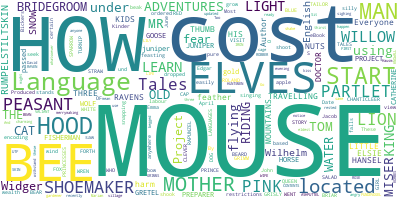

In [10]:
%matplotlib inline
# 별도 팝업으로 실행

import matplotlib.pyplot as plt # 모듈 호출
from wordcloud import WordCloud # 모듈 호출

word_count = dict(zip(words, df.n)) # 단어와 빈도수 짝지어 사전 생성 
wc = WordCloud(background_color='white', width=400, height=200) # 400*200 틀 생성

cloud = wc.fit_words(word_count) # 단어 핏팅
cloud.to_image() # 이미지 생성

# Daum 뉴스 크롤링
* 기사 링크 모으기

In [11]:
import requests

res=requests.get('http://search.daum.net/search?w=news&cluster=n&q=%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5&sort=recency')
# Daum에서 검색한 url을 가져옴

import lxml.html
root = lxml.html.fromstring(res.text)

# 리스트를 활용하여 검색 결과에 대한 링크 수집
urls = []
for link in root.cssselect('a.f_nb'):
    urls.append(link.attrib['href'])

* 기사 링크 본문 수집하기

In [12]:
# python에서 []:배열 or 리스트. {}:사전, ():튜플
# 검색 결과에 대해 수집된 링크 기사 내용 가져오기

articles = []
for u in urls:
    if not u.startswith("http"):
        continue
    res = requests.get(u)
    root = lxml.html.fromstring(res.text)
    body = root.cssselect(".article_view").pop()
    content = body.text_content()
    articles.append(content)